In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from random import randint

In [3]:
data = pd.read_csv("telecom_users.csv")
data

,Codigo,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,...,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,...,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,...,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.20,Nao
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,...,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,...,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.50,Nao
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,...,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.50,Nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Masculino,0,Sim,Nao,1,Sim,Nao,Fibra,...,Nao,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95.00,Sim
5982,5191,5982-PSMKW,Feminino,0,Sim,Sim,23,Sim,Sim,DSL,...,Sim,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.30,Nao
5983,5226,8044-BGWPI,Masculino,0,Sim,Sim,12,Sim,Nao,Nao,...,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao
5984,5390,7450-NWRTR,Masculino,1,Nao,Nao,12,Sim,Sim,Fibra,...,Sim,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim


In [4]:
data_corr = data[['Codigo','MesesComoCliente', 'Dependentes','TipoContrato','FormaPagamento', 'ValorMensal','TotalGasto', 'Churn']]
for linha in data_corr.index:
    # DEPENDENTES
    if data_corr.loc[linha, 'Dependentes'] == "Sim":
        data_corr.loc[linha, 'Dependentes'] = 2
    else:
        data_corr.loc[linha, 'Dependentes'] = 1
    
    # tipo contrato
    if data_corr.loc[linha, 'TipoContrato'] =="2 anos":
        data_corr.loc[linha, 'TipoContrato'] = 2
    elif data_corr.loc[linha, 'TipoContrato'] == "anual":
        data_corr.loc[linha, 'TipoContrato'] = 1
    else:
        data_corr.loc[linha, 'TipoContrato'] = 3
    
    # Forma de pagamento
    if data_corr.loc[linha, 'FormaPagamento'] == "CartaoCredito":
        data_corr.loc[linha, 'FormaPagamento'] = 1
    elif data_corr.loc[linha, 'FormaPagamento'] == "DebitoAutomatico":
        data_corr.loc[linha, 'FormaPagamento'] = 2
    elif data_corr.loc[linha, 'FormaPagamento'] ==  "BoletoEletronico":
        data_corr.loc[linha, 'FormaPagamento'] = 3
    else:
        data_corr.loc[linha, 'FormaPagamento'] = 4
    
    #Churn
    if data_corr.loc[linha, 'Churn'] == "Sim":
        data_corr.loc[linha, 'Churn'] = 1
    else:
        data_corr.loc[linha, 'Churn'] = 0

In [5]:
data_corr

,Codigo,MesesComoCliente,Dependentes,TipoContrato,FormaPagamento,ValorMensal,TotalGasto,Churn
0,1869,72,2,2,1,24.10,1734.65,0
1,4528,44,1,3,1,88.15,3973.20,0
2,6344,38,1,3,2,74.95,2869.85,1
3,6739,4,1,3,3,55.90,238.50,0
4,432,2,1,3,3,53.45,119.50,0
...,...,...,...,...,...,...,...,...
5981,3772,1,1,3,3,95.00,95.00,1
5982,5191,23,2,2,1,91.10,2198.30,0
5983,5226,12,2,3,3,21.15,306.05,0
5984,5390,12,1,3,3,99.45,1200.15,1


In [6]:
kmeans = KMeans(n_clusters=5)

In [7]:
kmeans.fit(data_corr[["Churn", "Dependentes", "TipoContrato", "FormaPagamento"]])

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

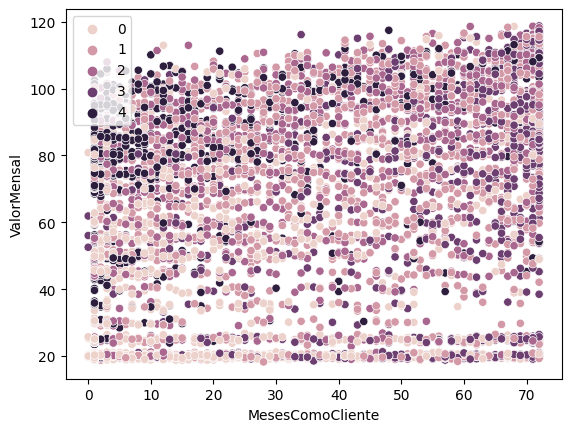

In [8]:
sns.scatterplot(x=data_corr["MesesComoCliente"], y=data_corr["ValorMensal"], hue=kmeans.labels_)

In [9]:
data_corr["Grupo"] = kmeans.labels_

C:\Users\rodri\AppData\Local\Temp\ipykernel_4204\2799549941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr["Grupo"] = kmeans.labels_


## Grupo 0 e suas correlações

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

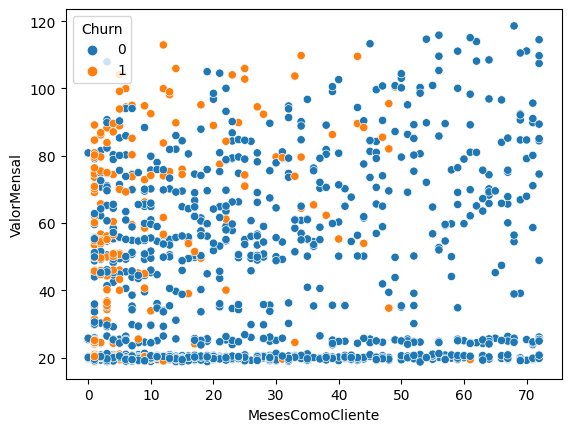

In [10]:
dados = data_corr[data_corr["Grupo"] == 0]
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Churn"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

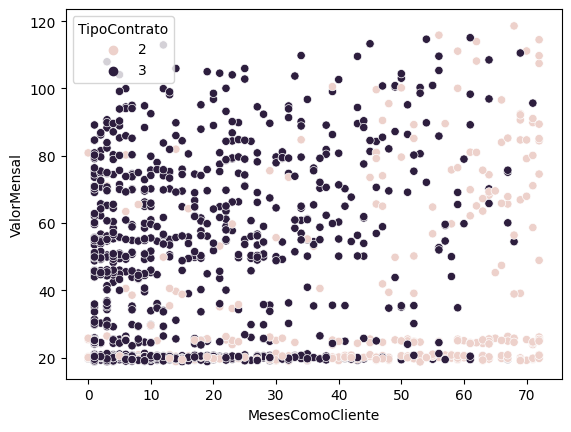

In [11]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["TipoContrato"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

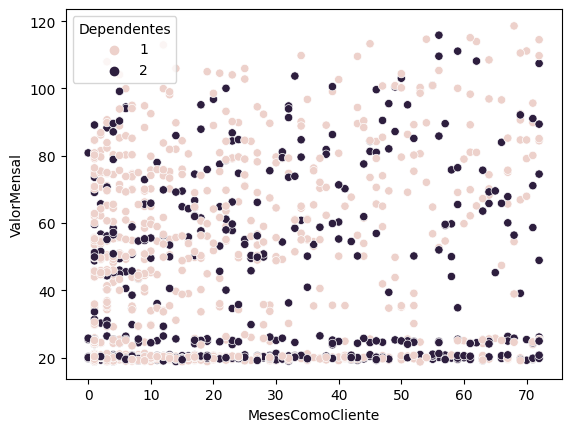

In [12]:
dados = data_corr[data_corr["Grupo"] == 0]
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Dependentes"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

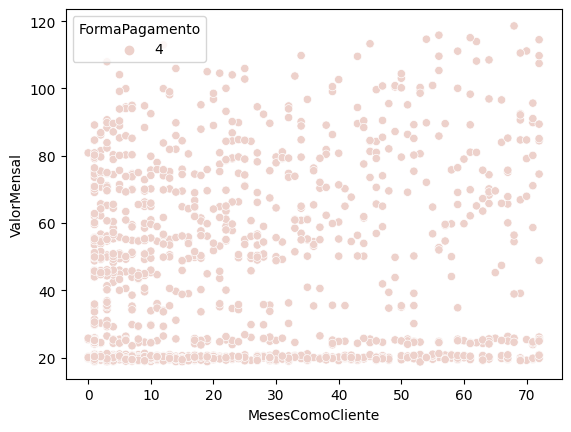

In [13]:
dados = data_corr[data_corr["Grupo"] == 0]
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["FormaPagamento"])

## grupo 1 e sua correlações

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

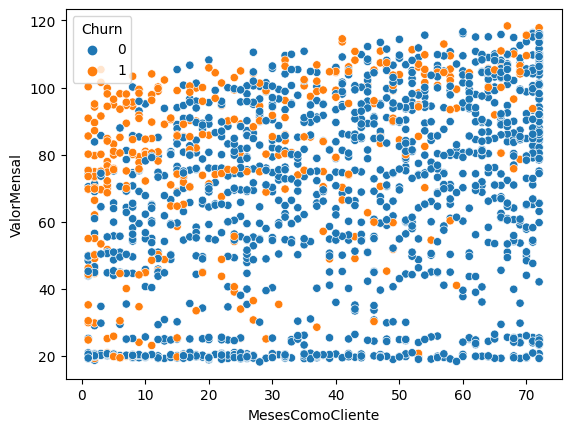

In [14]:
dados = data_corr[data_corr["Grupo"] == 1]
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Churn"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

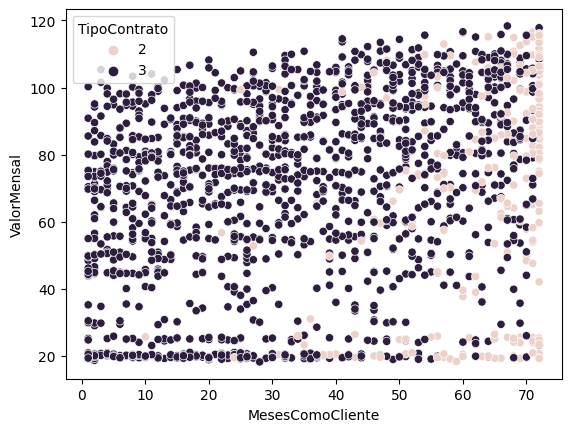

In [15]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["TipoContrato"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

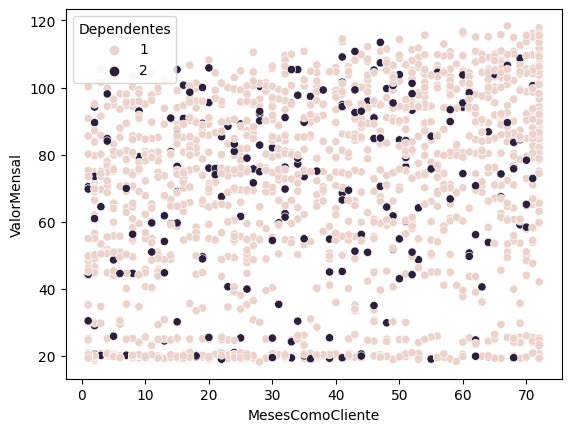

In [16]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Dependentes"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

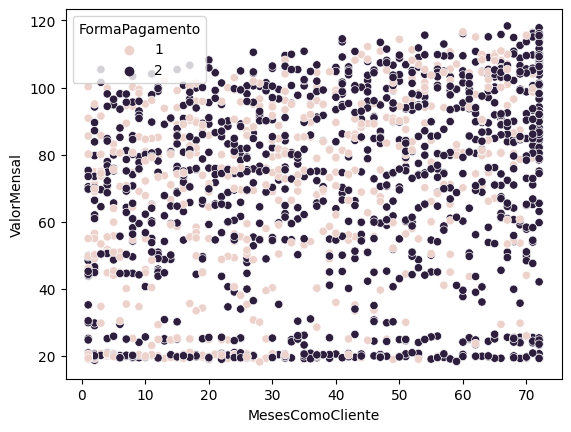

In [17]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["FormaPagamento"])

## grupo 2 e suas correlações

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

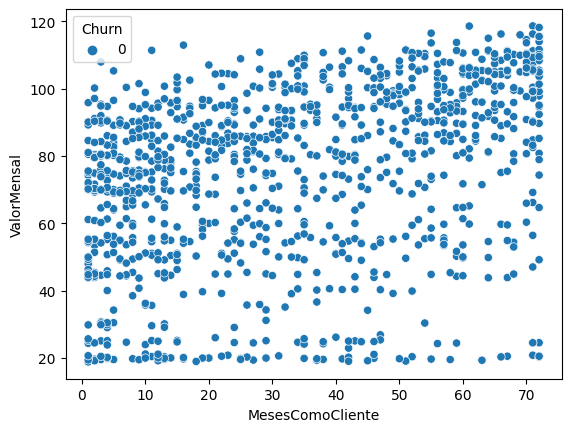

In [18]:
dados = data_corr[data_corr["Grupo"] == 2]
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Churn"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

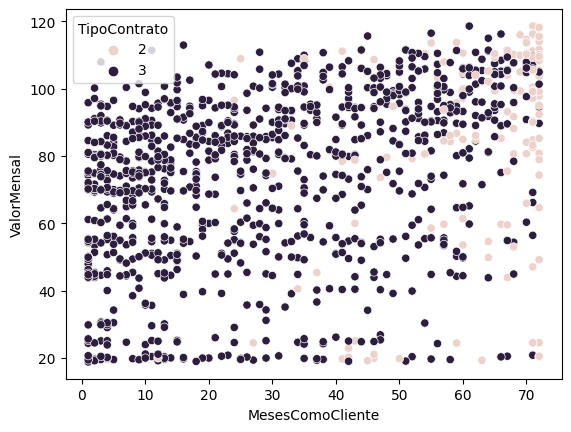

In [19]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["TipoContrato"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

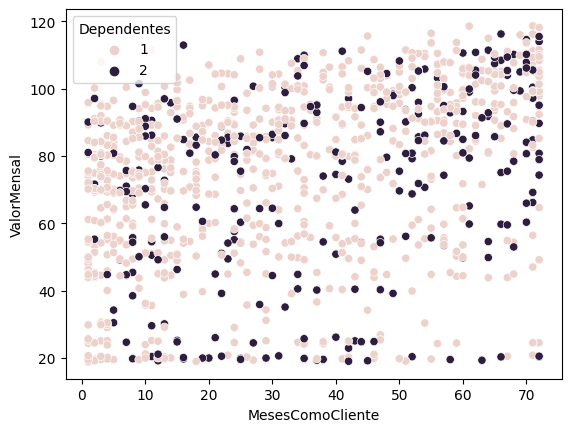

In [20]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Dependentes"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

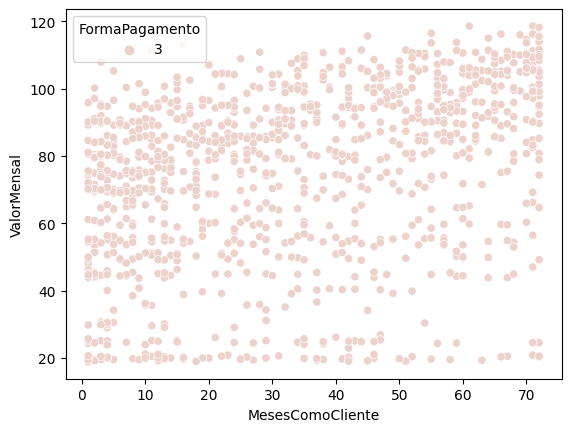

In [21]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["FormaPagamento"])

## grupo 3 e suas correlações

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

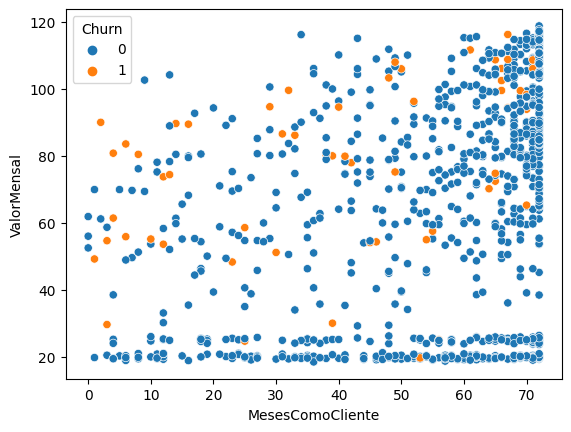

In [22]:
dados = data_corr[data_corr["Grupo"] == 3]
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Churn"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

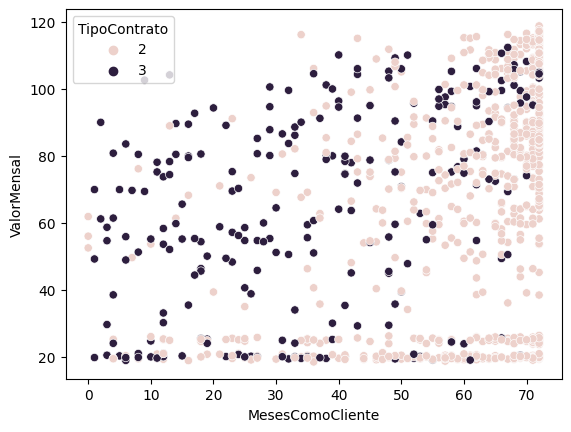

In [23]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["TipoContrato"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

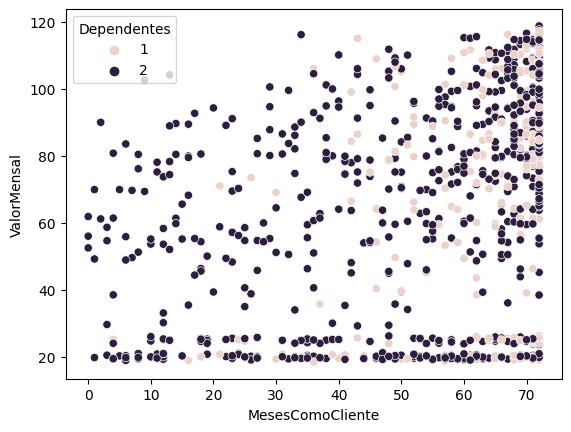

In [24]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Dependentes"])

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

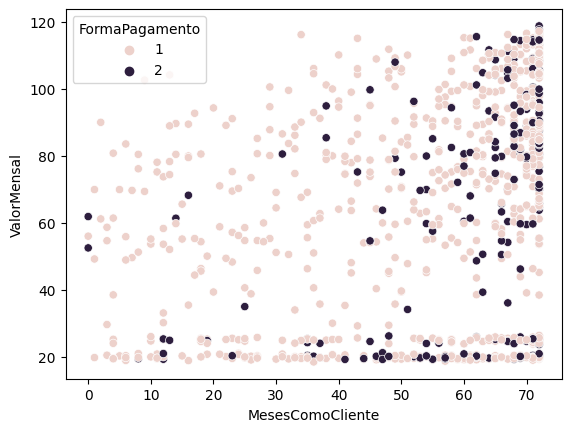

In [25]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["FormaPagamento"])

## Grupo 4 e suas coreelações

<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

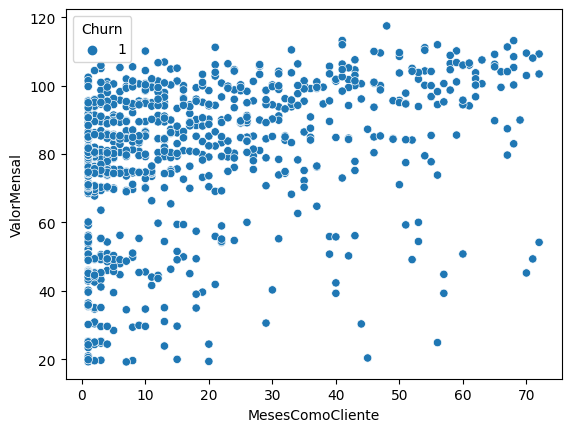

In [26]:
dados = data_corr[data_corr["Grupo"] == 4]
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Churn"])


<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

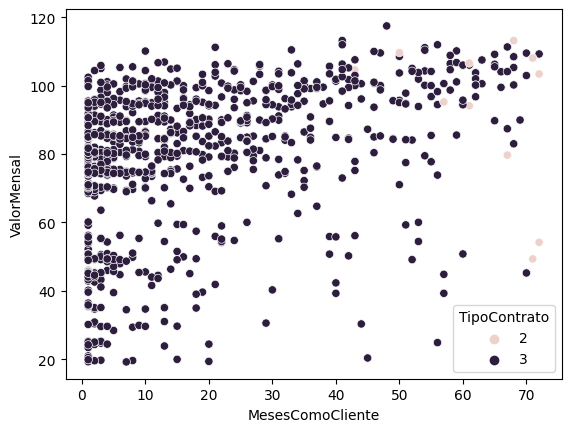

In [27]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["TipoContrato"])


<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

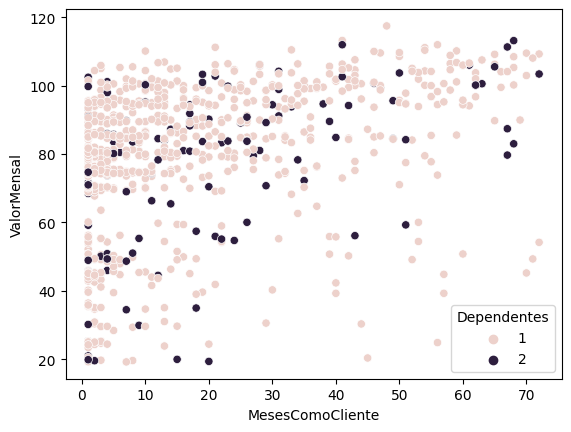

In [28]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["Dependentes"])


<AxesSubplot: xlabel='MesesComoCliente', ylabel='ValorMensal'>

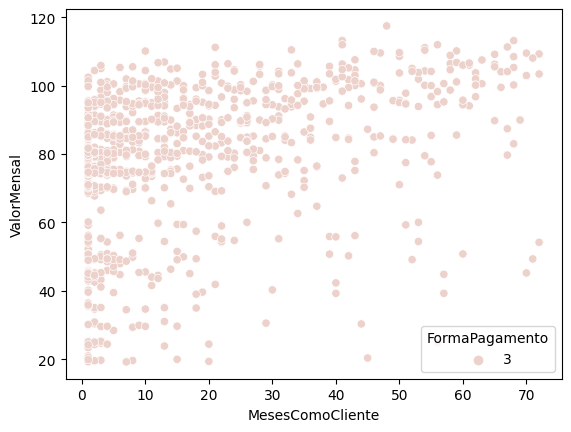

In [29]:
sns.scatterplot(x=dados["MesesComoCliente"], y=dados["ValorMensal"], hue=dados["FormaPagamento"])